<a href="https://colab.research.google.com/github/JayNguyen-123/MOVIE_RECOMMENDATION_SYSTEM_MACHINE_LEARNING/blob/main/Movie_Recommendation_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Movie Recommendation System with Machine Learning
- A Recommendation System is a filtration program whose prime goal is to predict a user's "rating" or "preference" toward a domain-specific item.  In this case, this domain-specific item is a movie. Therefore, the main focus of our recommendation system is to filter and predict only those movies that a user would prefer, given some data about the user.

### Types of Recommendation System

1. Content-based Filtering: Content-based filtering is a recommendation strategy that suggests items similar to those a user has previously liked. It calculates similarity (often using cosine similarity) between the user’s preferences and item attributes, such as lead actors, directors, and genres. For example, if a user enjoys ‘The Prestige,’ the system recommends movies with Christian Bale, the ‘Thriller’ genre, or films by Christopher Nolan.
2. Collaborative Filtering: Collabarative Filtering is a recommendation stragedy that considers the user's behavior and compares it with other users in the database.It uses the history of all users to influence the recommendation algorithm. Unlike a content-based recommender system, a collaborative filtering recommender relies on multiple users’ interactions with items to generate suggestions.
3. Item-based Collaborative Filtering: Focuses on finding similar movies instead of similar users to recommend to user ‘A’ based on their past preferences. It identifies pairs of movies rated/liked by the same users, measures their similarity across all users who rated both, and then suggests similar films based on the similarity scores.


### Building a Movie Recommedation System using Item-based Collaborative Filtering Algorithm

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
print(movies.head())



   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [2]:
print(ratings.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [3]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Removing noise from the data
""" To qulify for a movie, a minimum of 10 users should hoist a film. The user should
be voted for at least 50 times."""
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')


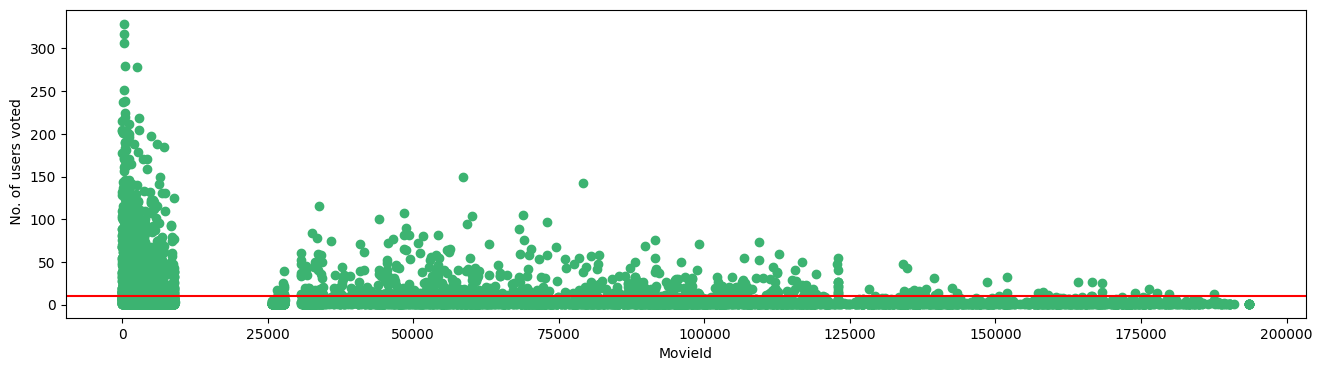

In [6]:
# Visualize the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_user_voted.index, no_user_voted, color='mediumseagreen')
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel(' No. of users voted')
plt.show()


In [7]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]


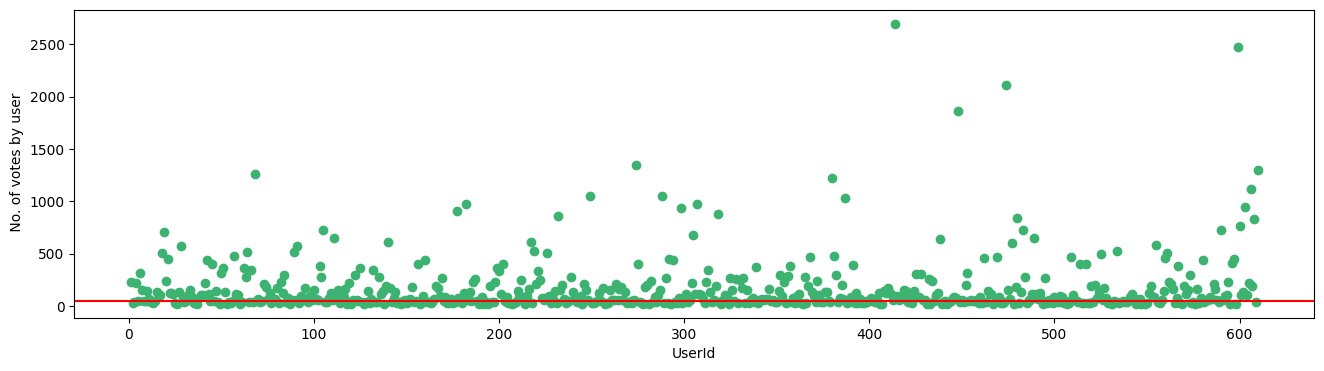

In [8]:
# Visualize the number of voters by each user with threshold of 50
f, ax = plt.subplots(1, 1, figsize=(16,4))
plt.scatter(no_movies_voted.index, no_movies_voted, color='mediumseagreen')
plt.axhline(y=50, color='r')
plt.xlabel('UserId')
plt.ylabel(' No. of votes by user')
plt.show()


### Removing Sparsity
- Removing sparsity with csr_matrix to reduce the sparsity


In [9]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)


### Compute the similarity with Cosine distance using KNN algorithm

In [10]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

### Recommendation Function


In [13]:
def get_movie_recommendation(movie_name):
  n_movies_to_recommend = 10
  movie_list = movies[movies['title'].str.contains(movie_name)]
  if len(movie_list):
    movie_idx = movie_list.iloc[0]['movieId']
    movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
    distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend+1)
    rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    recommend_frame = []

    for val in rec_movie_indices:
      movie_idx = final_dataset.iloc[val[0]]['movieId']
      idx = movies[movies['movieId'] == movie_idx].index
      recommend_frame.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})
    df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_recommend+1))
    return df
  else:
    return "No movies found. Check your input"

In [14]:
get_movie_recommendation("Iron Man")


,Title,Distance
1,Star Trek (2009),0.417513
2,Guardians of the Galaxy (2014),0.411029
3,Thor (2011),0.410508
4,Up (2009),0.403264
5,Batman Begins (2005),0.402929
6,Avatar (2009),0.375732
7,Iron Man 2 (2010),0.358014
8,"Avengers, The (2012)",0.341324
9,WALL·E (2008),0.332225
10,"Dark Knight, The (2008)",0.329462


In [15]:
get_movie_recommendation('Memento')

,Title,Distance
1,Donnie Darko (2001),0.434395
2,American History X (1998),0.427465
3,"Lord of the Rings: The Return of the King, The...",0.424384
4,Kill Bill: Vol. 2 (2004),0.422413
5,"Matrix, The (1999)",0.409884
6,"Lord of the Rings: The Two Towers, The (2002)",0.397019
7,Kill Bill: Vol. 1 (2003),0.395114
8,Eternal Sunshine of the Spotless Mind (2004),0.385666
9,"Lord of the Rings: The Fellowship of the Ring,...",0.378828
10,Fight Club (1999),0.330407
